<a href="https://colab.research.google.com/github/kevirui/Clasificacion-de-modelos-y-metricas/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definiendo datos y ejes

In [1]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/kevirui/Clasificacion-de-modelos-y-metricas/refs/heads/main/diabetes.csv")
data

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [2]:
x = data.drop(columns='diabetes', axis=1)
y = data['diabetes']

# Determinando ejes de entrenamiento, validación y de prueba

In [3]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(x, y, test_size=0.05, stratify=y, random_state=42)
x_val, x_train, y_val, y_train = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier(max_depth=3)
forest = RandomForestClassifier(max_depth=2)

tree.fit(x_train, y_train)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=2)

In [5]:
tree.score(x_train, y_train)

0.8404255319148937

In [6]:
tree.score(x_val, y_val)

0.6178571428571429

In [7]:
forest.score(x_train, y_train)

0.8297872340425532

In [8]:
forest.score(x_val, y_val)

0.7107142857142857

# Matrices de Confusión para evaluar predicciones de cada modelo

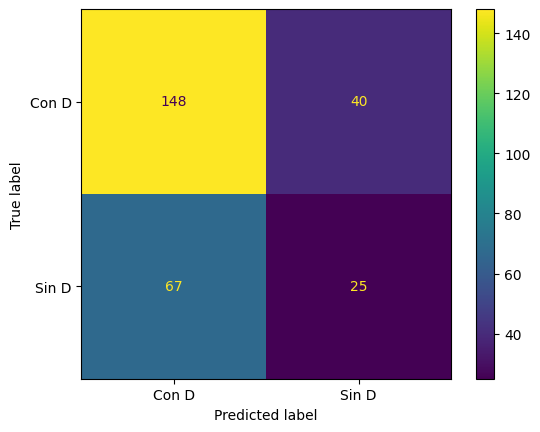

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_val, tree.predict(x_val), display_labels=['Con D', 'Sin D'])

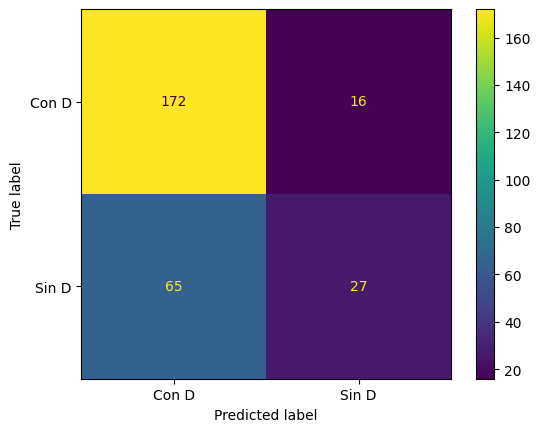

In [10]:
ConfusionMatrixDisplay.from_predictions(y_val, forest.predict(x_val), display_labels=['Con D', 'Sin D'])

# Evaluando metricas

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"La exactitud del tree model es: {accuracy_score(y_val, tree.predict(x_val))}")
print(f"La precisión del tree model es: {precision_score(y_val, tree.predict(x_val))}")
print(f"La sensibilidad del tree model es: {recall_score(y_val, tree.predict(x_val))}")
print(f"El F1 score del tree model es: {f1_score(y_val, tree.predict(x_val))}")
print("--------o---------")
print(f"La exactitud del forest model es: {accuracy_score(y_val, forest.predict(x_val))}")
print(f"La precisión del forest model es: {precision_score(y_val, forest.predict(x_val))}")
print(f"La sensibilidad del forest model es: {recall_score(y_val, forest.predict(x_val))}")
print(f"El F1 score del forest model es: {f1_score(y_val, forest.predict(x_val))}")

La exactitud del tree model es: 0.6178571428571429
La precisión del tree model es: 0.38461538461538464
La sensibilidad del tree model es: 0.2717391304347826
El F1 score del tree model es: 0.3184713375796178
--------o---------
La exactitud del forest model es: 0.7107142857142857
La precisión del forest model es: 0.627906976744186
La sensibilidad del forest model es: 0.29347826086956524
El F1 score del forest model es: 0.4


In [22]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

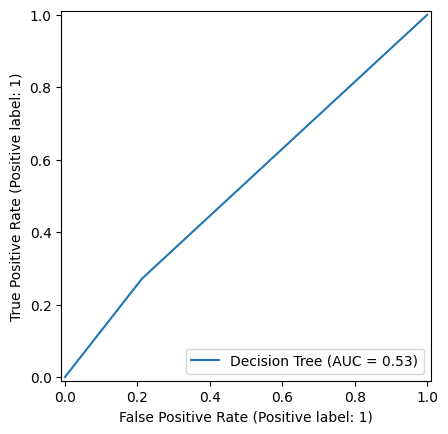

In [20]:
RocCurveDisplay.from_predictions(y_val, tree.predict(x_val), name='Decision Tree')

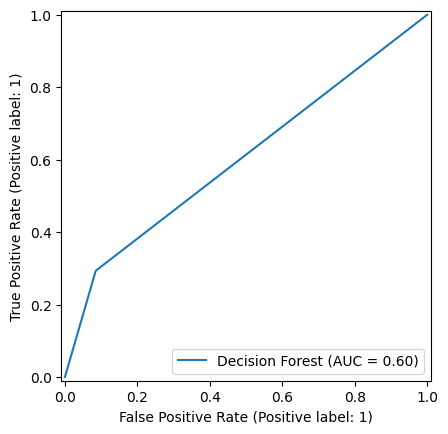

In [21]:
RocCurveDisplay.from_predictions(y_val, forest.predict(x_val), name='Decision Forest')

In [24]:
print(f"The area under ROC courve on Tree model: {roc_auc_score(y_val, tree.predict(x_val))}")
print(f"The area under ROC courve on Forest model: {roc_auc_score(y_val, forest.predict(x_val))}")

The area under ROC courve on Tree model: 0.529486586493987
The area under ROC courve on Forest model: 0.6041859389454209


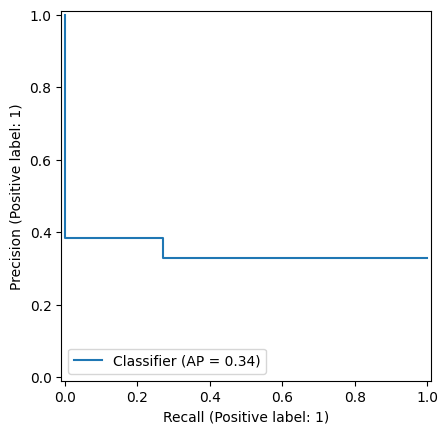

In [29]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_predictions(y_val, tree.predict(x_val));

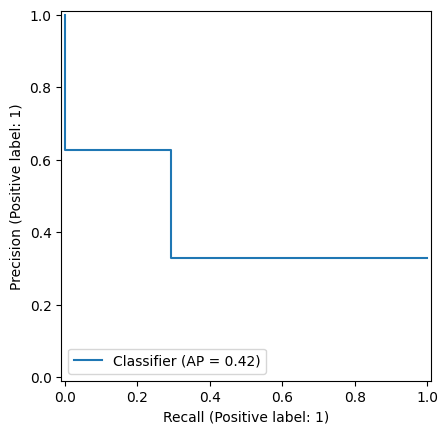

In [28]:
PrecisionRecallDisplay.from_predictions(y_val, forest.predict(x_val));

In [30]:
print(f"El score promedio de precisión vs recall en Tree Model es: {average_precision_score(y_val, tree.predict(x_val))}")

El score promedio de precisión vs recall en Tree Model es: 0.3438007644529384


In [32]:
print(f"El score promedio de precisión vs recall en Forest Model es: {average_precision_score(y_val, forest.predict(x_val))}")

El score promedio de precisión vs recall en Forest Model es: 0.4164199046656074


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_val, tree.predict(x_val)))
print(classification_report(y_val, forest.predict(x_val)))

              precision    recall  f1-score   support

           0       0.69      0.79      0.73       188
           1       0.38      0.27      0.32        92

    accuracy                           0.62       280
   macro avg       0.54      0.53      0.53       280
weighted avg       0.59      0.62      0.60       280

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       188
           1       0.63      0.29      0.40        92

    accuracy                           0.71       280
   macro avg       0.68      0.60      0.60       280
weighted avg       0.69      0.71      0.67       280

